In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sparse
import scipy.sparse.linalg as sparse_linalg
import scipy.signal
import scipy
from scipy.fft import fft, fftfreq

#plot packages
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#import seaborn as sns
import matplotlib.animation as animation

from matplotlib import cm
#additional
import time
from matplotlib.patches import RegularPolygon

## Plot of geometry for QRW

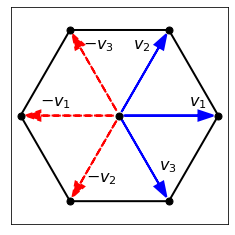

In [133]:
fig, ax = plt.subplots(1)
ax.set_aspect('equal')

hexagon = RegularPolygon((0, 0), numVertices=6, radius=1.0, 
                         orientation=np.radians(30), 
                         facecolor='white', edgecolor='k', linewidth=2.0)
ax.add_patch(hexagon)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_xticks([])
ax.set_yticks([])
plt.plot([-1.0,1.0,-0.5,0.5,0.5,-0.5,0.0], [0.0, 0.0,-np.sqrt(3)/2,np.sqrt(3)/2,-np.sqrt(3)/2,np.sqrt(3)/2,0.0], 'o',
         color='k', markersize=7.0)
#plt.plot([-0.5,0.5], [-np.sqrt(3)/2,np.sqrt(3)/2], color='k', linewidth=2.0)
#plt.plot([0.5,-0.5], [-np.sqrt(3)/2,np.sqrt(3)/2], color='k', linewidth=2.0)
plt.arrow(0.05, 0.00, 0.75, 0.0, linewidth=2.0, shape='full', head_width=0.1, color='blue')
plt.arrow(0.05/2, 0.05*np.sqrt(3)/2, 0.75/2, 0.75*np.sqrt(3)/2, linewidth=2.0, shape='full', head_width=0.1, color='blue')
plt.arrow(0.05/2, -0.05*np.sqrt(3)/2, 0.75/2, -0.75*np.sqrt(3)/2, linewidth=2.0, shape='full', head_width=0.1, color='blue')

plt.arrow(-0.05, 0.00, -0.75, 0.0, linewidth=2.0, shape='full', head_width=0.1, color='red', linestyle='--')
plt.arrow(-0.05/2, -0.05*np.sqrt(3)/2, -0.75/2, -0.75*np.sqrt(3)/2, linewidth=2.0, shape='full', head_width=0.1, color='red', linestyle='--')
plt.arrow(-0.05/2, 0.05*np.sqrt(3)/2, -0.75/2, 0.75*np.sqrt(3)/2, linewidth=2.0, shape='full', head_width=0.1, color='red', linestyle='--')

plt.text(0.7, 0.1, r'$v_{1}$',fontsize=16, ma='center', fontstyle='normal')
plt.text(0.14, 0.67, r'$v_{2}$',fontsize=16, ma='center', fontstyle='normal')
plt.text(0.4, -0.55, r'$v_{3}$',fontsize=16, ma='center', fontstyle='normal')

plt.text(-0.8, 0.1, r'$-v_{1}$',fontsize=16, ma='center', fontstyle='normal')
plt.text(-0.34, -0.67, r'$-v_{2}$',fontsize=16, ma='center', fontstyle='normal')
plt.text(-0.37, 0.67, r'$-v_{3}$',fontsize=16, ma='center', fontstyle='normal')

plt.savefig('fig1_QRW_layout.pdf', dpi=500, bbox_inches='tight')

plt.show()

## 3D plot of distribution of success probabilities - Fig.1

In [6]:
with open('data_files/max_map_values_def_5piover8_piover2.npy', 'rb') as f:
    max_value = np.load(f)
    max_value_nodef_0 = np.load(f)
    max_value_nodef_1= np.load(f)
    theta1_array= np.load(f)
    theta2_array= np.load(f)

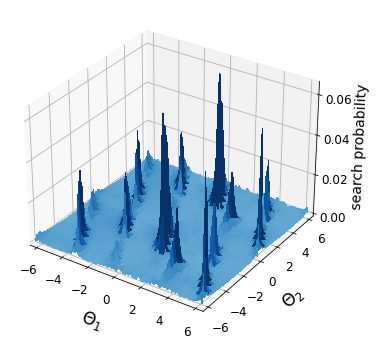

In [73]:
fig2, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(6.4,4.8))

X, Y = np.meshgrid(theta1_array, theta2_array)

surf = ax.plot_surface(Y, X, max_value, cmap = cm.Blues, #cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, vmin=-0.01, vmax=0.01)

ax.set_xlabel(r'$\Theta_1$', fontsize=17, labelpad=10)
ax.set_ylabel(r'$\Theta_2$', fontsize=17, labelpad=10)
ax.set_zlabel('search probability', fontsize=14, labelpad=5)
ax.set_xlim3d(-2*np.pi, 2*np.pi)
ax.set_ylim3d(-2*np.pi, 2*np.pi)
ax.set_zlim(-0.00, 0.065)
ax.set_zticks([0.0, 0.02, 0.04, 0.06])

ax.view_init(elev=30, azim=-56)
ax.set_box_aspect(aspect=None, zoom=1.0)
ax.tick_params(axis='both', which='major', labelsize=12)

#cset = ax.contourf(X, Y, max_value, zdir='z', offset=-0.05, cmap=cm.coolwarm)

plt.tight_layout()
#fig2.subplots_adjust(left=-0.2, right=1.1, bottom=-0.1, top=1.0)

#plt.savefig('max_map_defect_m3d6_mpi_07.png')
#fig.tight_layout(rect=[0.1,0.1,0.9, 0.95])
plt.savefig('max_map_3D_defect_5piover8_piover2.pdf', dpi=500, bbox_inches='tight')
plt.show()

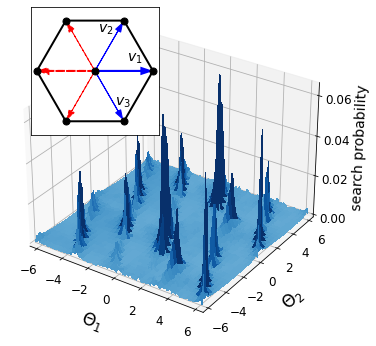

In [7]:
fig2, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(6.4,4.8))

X, Y = np.meshgrid(theta1_array, theta2_array)

surf = ax.plot_surface(Y, X, max_value, cmap = cm.Blues, #cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, vmin=-0.01, vmax=0.01)

ax.set_xlabel(r'$\Theta_1$', fontsize=17, labelpad=10)
ax.set_ylabel(r'$\Theta_2$', fontsize=17, labelpad=10)
ax.set_zlabel('search probability', fontsize=14, labelpad=5)
ax.set_xlim3d(-2*np.pi, 2*np.pi)
ax.set_ylim3d(-2*np.pi, 2*np.pi)
ax.set_zlim(-0.00, 0.065)
ax.set_zticks([0.0, 0.02, 0.04, 0.06])

ax.view_init(elev=30, azim=-56)
ax.set_box_aspect(aspect=None, zoom=1.0)
ax.tick_params(axis='both', which='major', labelsize=12)

#cset = ax.contourf(X, Y, max_value, zdir='z', offset=-0.05, cmap=cm.coolwarm)

plt.tight_layout()
#fig2.subplots_adjust(left=-0.2, right=1.1, bottom=-0.1, top=1.0)

#plt.savefig('max_map_defect_m3d6_mpi_07.png')
#fig.tight_layout(rect=[0.1,0.1,0.9, 0.95])

rect = [0.2, 0.6, 0.37, 0.37]

ax_inset1 = fig2.add_axes(rect, anchor='NW')
ax_inset1.set_aspect('equal')

hexagon = RegularPolygon((0, 0), numVertices=6, radius=1.0, 
                         orientation=np.radians(30), 
                         facecolor='white', edgecolor='k', linewidth=2.0)
ax_inset1.add_patch(hexagon)
ax_inset1.set_xlim(-1.1, 1.1)
ax_inset1.set_ylim(-1.1, 1.1)
ax_inset1.set_xticks([])
ax_inset1.set_yticks([])
ax_inset1.plot([-1.0,1.0,-0.5,0.5,0.5,-0.5,0.0], [0.0, 0.0,-np.sqrt(3)/2,np.sqrt(3)/2,-np.sqrt(3)/2,np.sqrt(3)/2,0.0], 'o',
         color='k', markersize=7.0)
#plt.plot([-0.5,0.5], [-np.sqrt(3)/2,np.sqrt(3)/2], color='k', linewidth=2.0)
#plt.plot([0.5,-0.5], [-np.sqrt(3)/2,np.sqrt(3)/2], color='k', linewidth=2.0)
ax_inset1.arrow(0.05, 0.00, 0.75, 0.0, linewidth=2.0, shape='full', head_width=0.1, color='blue')
ax_inset1.arrow(0.05/2, 0.05*np.sqrt(3)/2, 0.75/2, 0.75*np.sqrt(3)/2, linewidth=1.0, shape='full', head_width=0.1, color='blue')
ax_inset1.arrow(0.05/2, -0.05*np.sqrt(3)/2, 0.75/2, -0.75*np.sqrt(3)/2, linewidth=1.0, shape='full', head_width=0.1, color='blue')

ax_inset1.arrow(-0.05, 0.00, -0.75, 0.0, linewidth=2.0, shape='full', head_width=0.1, color='red', linestyle='--')
ax_inset1.arrow(-0.05/2, -0.05*np.sqrt(3)/2, -0.75/2, -0.75*np.sqrt(3)/2, linewidth=1.0, shape='full', head_width=0.1, color='red', linestyle='--')
ax_inset1.arrow(-0.05/2, 0.05*np.sqrt(3)/2, -0.75/2, 0.75*np.sqrt(3)/2, linewidth=1.0, shape='full', head_width=0.1, color='red', linestyle='--')

ax_inset1.text(0.55, 0.16, r'$v_{1}$',fontsize=14, ma='center', fontstyle='normal')
ax_inset1.text(0.06, 0.67, r'$v_{2}$',fontsize=14, ma='center', fontstyle='normal')
ax_inset1.text(0.35, -0.6, r'$v_{3}$',fontsize=14, ma='center', fontstyle='normal')

#ax_inset1.text(-0.8, 0.1, r'$-v_{1}$',fontsize=14, ma='center', fontstyle='normal')
#ax_inset1.text(-0.34, -0.67, r'$-v_{2}$',fontsize=14, ma='center', fontstyle='normal')
#ax_inset1.text(-0.37, 0.67, r'$-v_{3}$',fontsize=14, ma='center', fontstyle='normal')

plt.savefig('max_map_3D_defect_5piover8_piover2_v2.pdf', dpi=500, bbox_inches='tight')
plt.show()

## Plotting single colormap of density on defect 
(technical part for test for next section)

In [66]:
with open('data_files/max_map_values_def_5piover8_piover2.npy', 'rb') as f:
    max_value = np.load(f)
    max_value_nodef_0 = np.load(f)
    max_value_nodef_1= np.load(f)
    theta1_array= np.load(f)
    theta2_array= np.load(f)

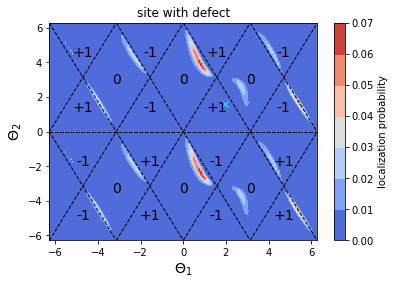

In [67]:
X, Y = np.meshgrid(theta1_array, theta2_array)

plt.subplot(111)
cset = plt.contourf(Y, X, max_value, cmap=cm.coolwarm)

#plot topo phase lines
for i in range(-1,4):
    plt.plot([-2*np.pi+i*np.pi, 0+i*np.pi], [-2*np.pi, 2*np.pi], '--', color='black', linewidth = 1.0) 
    plt.plot([-2*np.pi+i*np.pi, 0+i*np.pi], [2*np.pi, -2*np.pi], '--', color='black', linewidth = 1.0) 
plt.plot([-2*np.pi, 2*np.pi], [0, 0], '--', color='black', linewidth = 1.0)

plt.plot([5*np.pi/8], [np.pi/2], 'x', color='cyan')

plt.xlim(-2*np.pi, 2*np.pi)
plt.ylim(-2*np.pi, 2*np.pi)
plt.text(np.pi/2, np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )
plt.text(np.pi/2, 3*np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )
plt.text(-3*np.pi/2, np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )
plt.text(-3*np.pi/2, 3*np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )

plt.text(-np.pi/2, np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )
plt.text(-np.pi/2, 3*np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )
plt.text(3*np.pi/2, np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )
plt.text(3*np.pi/2, 3*np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )

plt.text(np.pi/2, -np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )
plt.text(np.pi/2, -3*np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )
plt.text(-np.pi/2, -np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )
plt.text(-np.pi/2, -3*np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )
plt.text(-3*np.pi/2, -np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )
plt.text(-3*np.pi/2, -3*np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )
plt.text(3*np.pi/2, -np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )
plt.text(3*np.pi/2, -3*np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )

plt.text(0, np.pi-0.4, '0', fontsize=14, color='black', horizontalalignment='center', )
plt.text(0, -np.pi-0.4, '0', fontsize=14, color='black', horizontalalignment='center', )
plt.text(np.pi, np.pi-0.4, '0', fontsize=14, color='black', horizontalalignment='center', )
plt.text(np.pi, -np.pi-0.4, '0', fontsize=14, color='black', horizontalalignment='center', )
plt.text(-np.pi, np.pi-0.4, '0', fontsize=14, color='black', horizontalalignment='center', )
plt.text(-np.pi, -np.pi-0.4, '0', fontsize=14, color='black', horizontalalignment='center', )

    
plt.xlabel(r'$\Theta_1$', fontsize=14)
plt.ylabel(r'$\Theta_2$', fontsize=14)
plt.colorbar(label='localization probability')
plt.title('site with defect')

plt.show()

## Gif plot of maps as function of defect position in Theta_1

In [137]:
defect_positions_theta_1 = [-np.pi, -7*np.pi/8, -3*np.pi/4, -5*np.pi/8, -np.pi/2, -7*np.pi/16, -3*np.pi/8,
                            -np.pi/4,  -np.pi/8, -np.pi/16, 0, 
                            np.pi/16, np.pi/8, np.pi/4, 3*np.pi/8,  7*np.pi/16, np.pi/2, 5*np.pi/8,
                            3*np.pi/4, 7*np.pi/8, np.pi]
folder='data_files/'
file_names = ['max_map_values_def_mpi_piover2.npy',
              'max_map_values_def_m7piover8_piover2.npy',
              'max_map_values_def_m3piover4_piover2.npy',
              'max_map_values_def_m5piover8_piover2.npy',
              'max_map_values_def_mpiover2_piover2.npy',
              'max_map_values_def_m7piover16_piover2.npy',
              'max_map_values_def_m3piover8_piover2.npy',
              'max_map_values_def_mpiover4_piover2.npy',
               'max_map_values_def_mpiover8_piover2.npy',
              'max_map_values_def_mpiover16_piover2.npy', 
             'max_map_values_def_0_piover2.npy', 
              'max_map_values_def_piover16_piover2.npy',
              'max_map_values_def_piover8_piover2.npy', 
              'max_map_values_def_piover4_piover2.npy',
              'max_map_values_def_3piover8_piover2.npy',
              'max_map_values_def_7piover16_piover2.npy', 
              'max_map_values_def_piover2_piover2.npy',
              'max_map_values_def_5piover8_piover2.npy',
              'max_map_values_def_3piover4_piover2.npy',
              'max_map_values_def_7piover8_piover2.npy', 
              'max_map_values_def_pi_piover2.npy']
print(len(defect_positions_theta_1), len(file_names))

21 21


0 done
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done


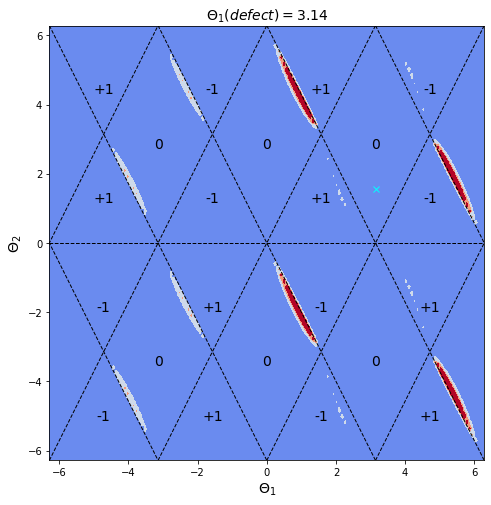

In [138]:
frame_number=len(defect_positions_theta_1)
X, Y = np.meshgrid(theta1_array, theta2_array)

fig, ax = plt.subplots(figsize=(8, 8))


def init():
    cset = plt.contourf(Y, X, np.zeros((len(theta1_array), len(theta1_array))), vmax=0.05, cmap=cm.coolwarm)
    plt.gca().set_aspect('equal')
    plt.xlabel(r'$\Theta_1$', fontsize=14)
    plt.ylabel(r'$\Theta_2$', fontsize=14)
    



def animate(j):
    ax.clear()
    with open(folder+file_names[j], 'rb') as f:
        max_value = np.load(f)
        max_value_nodef_0 = np.load(f)
        max_value_nodef_1= np.load(f)
        theta1_array= np.load(f)
        theta2_array= np.load(f)
        
    ax.contourf(Y, X, max_value, vmax=0.05, cmap=cm.coolwarm)
    ax.set_aspect('equal')
    
    #plot topo phase lines
    for i in range(-1,4):
        plt.plot([-2*np.pi+i*np.pi, 0+i*np.pi], [-2*np.pi, 2*np.pi], '--', color='black', linewidth = 1.0) 
        plt.plot([-2*np.pi+i*np.pi, 0+i*np.pi], [2*np.pi, -2*np.pi], '--', color='black', linewidth = 1.0) 
    plt.plot([-2*np.pi, 2*np.pi], [0, 0], '--', color='black', linewidth = 1.0)

    plt.xlim(-2*np.pi, 2*np.pi)
    plt.ylim(-2*np.pi, 2*np.pi)
    plt.text(np.pi/2, np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(np.pi/2, 3*np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(-3*np.pi/2, np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(-3*np.pi/2, 3*np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )

    plt.text(-np.pi/2, np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(-np.pi/2, 3*np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(3*np.pi/2, np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(3*np.pi/2, 3*np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )

    plt.text(np.pi/2, -np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(np.pi/2, -3*np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(-np.pi/2, -np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(-np.pi/2, -3*np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(-3*np.pi/2, -np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(-3*np.pi/2, -3*np.pi/2-0.4, '-1', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(3*np.pi/2, -np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(3*np.pi/2, -3*np.pi/2-0.4, '+1', fontsize=14, color='black', horizontalalignment='center', )

    plt.text(0, np.pi-0.4, '0', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(0, -np.pi-0.4, '0', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(np.pi, np.pi-0.4, '0', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(np.pi, -np.pi-0.4, '0', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(-np.pi, np.pi-0.4, '0', fontsize=14, color='black', horizontalalignment='center', )
    plt.text(-np.pi, -np.pi-0.4, '0', fontsize=14, color='black', horizontalalignment='center', )
    
    plt.title(r'$\Theta_{1}(defect)=$'+str(round(defect_positions_theta_1[j], 2)), fontsize=14)
    plt.plot([defect_positions_theta_1[j]], [np.pi/2], 'x', color='cyan')
    plt.xlabel(r'$\Theta_1$', fontsize=14)
    plt.ylabel(r'$\Theta_2$', fontsize=14)
    print(j, 'done')

anim = animation.FuncAnimation(fig, animate, init_func = init, interval=1000, frames=frame_number, 
                               repeat = False)

savefile = r"theta_1_defect_dependence.gif"
pillowwriter = animation.PillowWriter(fps=1)
anim.save(savefile, writer=pillowwriter)

## Overlap criteria fig 3 a

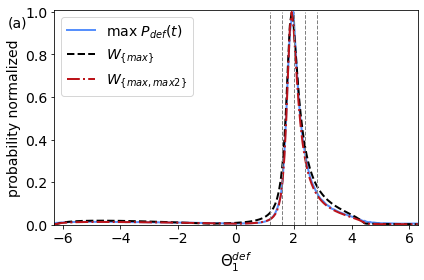

In [3]:
figure, fig = plt.subplots(1, 1) #, figsize=(6.4, 4.0))

color_list = ["#5790fc", "#f89c20", "#e42536", "#964a8b", "#9c9ca1", "#7a21dd"]

theta_array = np.linspace(-2*np.pi, 2*np.pi, 200)

max_value = np.array([0.00032784790748005256, 0.0005435704467185456, 0.0005357090299626076, 0.0006241034574118733, 0.0006253967948094522, 0.000690521828216798, 0.0007291479807026502, 0.0007281979502311363, 0.0008084496618902624, 0.0007675607219041068, 0.0007887282699981778, 0.0008011548357576001, 0.0007977548059325493, 0.0008216238094285058, 0.0008780326356031553, 0.0008509575570138706, 0.0008213702158543521, 0.0008858038221561068, 0.0009036244998962102, 0.0008622661903908526, 0.0008604824013882919, 0.0008328460269991423, 0.0008528590681137328, 0.0008832919075279795, 0.0008476555312878311, 0.0008579799685518615, 0.0008518965947182236, 0.0008650322956990347, 0.0008506836107928975, 0.0008491772214745692, 0.0008794808021419182, 0.0008602302815031912, 0.0008103090175580365, 0.0008062877962508734, 0.0008333352671080718, 0.000813412116651086, 0.0008195530629718915, 0.0008173903226235511, 0.0008311492410199545, 0.000768922888424495, 0.0007741713616921185, 0.0008158085147553734, 0.0007905172159707758, 0.0007698636178362271, 0.0007877922710161987, 0.0007563995646440195, 0.0007866831621393948, 0.0007639916611086035, 0.00073599733851343, 0.0007527289913386919, 0.000767259011759104, 0.000722321436255224, 0.0007461781098299168, 0.0007163978820708559, 0.0007364096959746438, 0.0007224101840044334, 0.0006886229556844399, 0.0007252518390136446, 0.0006708482505275945, 0.0007098309077990491, 0.0007029237756964278, 0.0006669867608926408, 0.0006655947657403752, 0.0006728461646351041, 0.0006584567475094378, 0.0006405036845202459, 0.0006442206654083116, 0.000626493484217504, 0.0006350663919499501, 0.0006224438093848492, 0.0005923518900100582, 0.000581065862236633, 0.000594630778702245, 0.0005934780182411001, 0.0005884523608795333, 0.0005773028693403084, 0.00056552325699088, 0.0005575748498872888, 0.0005495142574166634, 0.0005253230746331992, 0.0005129441014029966, 0.0005174891430620972, 0.0005033862855936488, 0.0005221084403759849, 0.00048797756102411004, 0.00045621080654410166, 0.00046672652424374763, 0.0004633596979545849, 0.0004483935882539971, 0.0004501633306554162, 0.0004236191931932982, 0.0004102056327785237, 0.0004025819877533427, 0.0003826250223588558, 0.00038016164995851616, 0.0003942012535018166, 0.00039193173034742575, 0.0003767540548646024, 0.0003228952431314738, 0.00035152182047172787, 0.00032859411064621797, 0.0003417485994394949, 0.00033732615118623344, 0.00036289444612892514, 0.0003740646440365144, 0.00038658703477618354, 0.0003993059498987975, 0.00041340040132247695, 0.0004340732959598992, 0.00046017840045777864, 0.0004951737420911316, 0.0005367968515407001, 0.0005839336149067608, 0.0006469507261087782, 0.0007544866447477129, 0.0008924084211786982, 0.0010697088344794952, 0.0013047039724485648, 0.0016205815274570332, 0.0020654720175393598, 0.0026966956668875728, 0.003579083850611779, 0.004920914115448059, 0.006708761262584234, 0.008847790938794321, 0.013756907956438195, 0.02251241025477443, 0.034016977442449296, 0.04795513779505529, 0.05969992034867622, 0.06439083050301332, 0.06631612058920032, 0.055959542057455236, 0.046402956484551096, 0.038042675601732676, 0.031781651031782224, 0.02708353909961938, 0.02341584776962052, 0.02003078662220195, 0.01727244544718841, 0.015054080288293293, 0.013295037503411303, 0.012023335403107717, 0.010785219391015174, 0.009731602022565069, 0.008722308700511537, 0.007908440522723567, 0.007466080481041537, 0.006831035967684838, 0.006232535870446996, 0.005882325256359143, 0.005537993054257325, 0.0049429948567199546, 0.004769792010547036, 0.004491361824162189, 0.004225211359643394, 0.0038984184520964946, 0.003703918181042179, 0.0034960231917486625, 0.0032081265473181387, 0.0031212145061025667, 0.0028379265368678893, 0.0026490003717489943, 0.002475259020717652, 0.0023097085488116096, 0.002126210520575164, 0.0018230428510347483, 0.0016509689561808626, 0.0014477521033916586, 0.0011348370517399184, 0.001174839439743493, 0.0008819356123857212, 0.000757293182875263, 0.0008258037808488271, 0.0006270586439933231, 0.000641985300013003, 0.0005649814389534736, 0.00048038716809539045, 0.0004862689055645621, 0.0004201071065631529, 0.00040018786797939667, 0.0004252585073625701, 0.0004051657041782555, 0.00041290690336176115, 0.00036550288428266215, 0.00037002341820850746, 0.00035885196117606445, 0.00029468208279916135, 0.00029363452565267604, 0.0002898523895533625, 0.0002912417678635196, 0.00029511096974830044, 0.0002951646726522437, 0.0002735566617794944, 0.00032472654564656825, 0.0003134412161082656, 0.0002728988562333694, 0.0003225313292474301, 0.0003268426448606141, 0.0003278479074800522])
max_value_of_overlap = [0.21445028676562933, 0.34871385509742625, 0.4427491440487713, 0.4919319760596129, 0.5216187481116801, 0.5423921778732396, 0.5582695245615837, 0.5710494617479952, 0.5816755373068515, 0.5907060332811459, 0.5985016024289362, 0.6053107330061211, 0.6113130849422077, 0.6166434331073808, 0.6214058381852063, 0.6256825145637035, 0.6295396395617455, 0.6330313065676185, 0.6362023026246711, 0.6390901138498742, 0.6417264074932761, 0.6441381494841912, 0.6463484619782386, 0.6483772915219801, 0.6502419366860569, 0.6519574696785446, 0.6535370767837738, 0.6549923358184961, 0.6563334441311992, 0.657569407340804, 0.6587081965983047, 0.6597568803807663, 0.6607217355054571, 0.6616083410551513, 0.6624216581453357, 0.6631660978779789, 0.6638455793702643, 0.6644635793879359, 0.6650231748287482, 0.6655270790735945, 0.665977673039593, 0.666377031619455, 0.6667269460687579, 0.6670289428003552, 0.6672842989595027, 0.667494055080126, 0.6676590250595985, 0.667779803634049, 0.6678567714860457, 0.6678900980713836, 0.6678797422086042, 0.6678254504313275, 0.667726753066261, 0.6675829579510506, 0.6673931416661402, 0.6671561381033388, 0.6668705241405365, 0.6665346021314387, 0.6661463788494455, 0.6657035404444711, 0.6652034228768704, 0.6646429771814186, 0.664018728781281, 0.6633267299128753, 0.6625625040309204, 0.6617209808309414, 0.6607964202445498, 0.6597823234186488, 0.6586713282683238, 0.6574550866753374, 0.6561241197656237, 0.6546676469103925, 0.6530733831175894, 0.6513272982663877, 0.649413330127284, 0.6473130412300642, 0.6450052073003868, 0.6424653220722872, 0.6396649996682663, 0.6365712512717093, 0.6331456073416153, 0.6293430499918511, 0.6251107122926535, 0.6203862922163453, 0.6150961191284968, 0.609152801134764, 0.6024523744149153, 0.5948708751828267, 0.5862602689699201, 0.5764437142621786, 0.5652102305741514, 0.5523090177567218, 0.5374439707435922, 0.5202693545794215, 0.5003879736193567, 0.4773527028308211, 0.45066852774691324, 0.4197800487036758, 0.38400759423558883, 0.34242933475778287, 0.29416159987762464, 0.24063314636476668, 0.18875357468110768, 0.17071518260408702, 0.15854860479022903, 0.14287241169460907, 0.1292825549041829, 0.12036302426991662, 0.11065448343319136, 0.10008447415691933, 0.0882923052599582, 0.07479607500957784, 0.06812570661557006, 0.058246759728188574, 0.0651322653476214, 0.07114974189546669, 0.07798393804827213, 0.08709655618649245, 0.099060651663269, 0.11124745684290738, 0.12307435360819052, 0.1340363887413015, 0.1437031274598938, 0.1516854738970993, 0.15965882015472266, 0.17701232368451306, 0.19301978923214755, 0.20459164945099861, 0.22337106435108564, 0.2741804176315685, 0.3260217436373029, 0.3726815897159967, 0.412032539590123, 0.44466572518551717, 0.47175834971909153, 0.49433785526960006, 0.5132147330119297, 0.5290333422816812, 0.5423135359371826, 0.5534769808526586, 0.562865554434702, 0.5707558207061855, 0.5773709954208889, 0.5828908650568837, 0.587459903786458, 0.5911938155725612, 0.5941847352478321, 0.59650531232185, 0.5982118754175185, 0.5993468417879775, 0.599940501375316, 0.600012271263169, 0.599571484670553, 0.5986177477573301, 0.5971408649923878, 0.5951202957349118, 0.5925240545273585, 0.5893068945239062, 0.5854074979955904, 0.580744203316881, 0.5752084519140815, 0.5686544916928371, 0.5608826007762002, 0.5516104581939193, 0.5404215307634266, 0.5266661813390732, 0.5092604661235028, 0.48626084756914834, 0.45401456520912375, 0.40617526609663607, 0.3368316638083408, 0.2549890358781362, 0.24269970480723935, 0.23318776539025007, 0.2060851873273899, 0.1929395974775782, 0.1727094544802332, 0.16384238086293612, 0.15891594688242133, 0.16249292913179847, 0.1641632576247398, 0.16316889995262715, 0.15995308681027806, 0.15508681345134406, 0.14912953227141112, 0.14339045804582207, 0.14808651578824966, 0.1513418661298115, 0.1593955322975109, 0.17095431895338145, 0.18066036722397108, 0.1874000525596219, 0.19027374151143583, 0.18885711063528526, 0.18334903389063664, 0.19369677895893792, 0.24026862814360123, 0.28056351033275584, 0.2921204830655452, 0.2144502867656302]
max_value_of_overlap_product = np.array([0.19941919815900744, 0.19790331232319808, 0.2986427704527421, 0.3685431840849023, 0.41392630867091146, 0.4468465994348388, 0.47245031818857525, 0.4931777213471749, 0.5103608407403978, 0.5248152645276445, 0.5370851441967887, 0.5475572459970933, 0.5565197007791494, 0.5641949049602671, 0.5707592503723016, 0.5763556409180426, 0.5811018132138202, 0.5850960889255362, 0.5884214854183777, 0.5911487371085088, 0.593338570225267, 0.5950434511609699, 0.5963089542918364, 0.597174848616267, 0.5976759725439088, 0.5978429463017751, 0.5977027579564098, 0.597279249723582, 0.5965935246493913, 0.5956642890075188, 0.5945081422935082, 0.5931398241247258, 0.5915724254183699, 0.5898175697431824, 0.5878855696017106, 0.5857855615103081, 0.5835256230443279, 0.5811128744580053, 0.5785535670421983, 0.5758531600208973, 0.5730163874928675, 0.5700473166825067, 0.5669493985642573, 0.563725511757495, 0.5603780004501568, 0.5569087069903906, 0.5533189996859712, 0.5496097962652648, 0.5457815833787812, 0.541834432456691, 0.5377680121799545, 0.533581597770976, 0.529274077268233, 0.5248439549003591, 0.5202893516433709, 0.5156080030034061, 0.5107972540338295, 0.5058540515609348, 0.5007749335578665, 0.4955560155724617, 0.49019297407893325, 0.4846810265874559, 0.47901490830840837, 0.4731888451281064, 0.46719652261335076, 0.4610310507202555, 0.454684923841136, 0.44814997578298277, 0.44141732923452853, 0.4344773392499764, 0.42731953026198116, 0.41993252614437526, 0.41230397288960724, 0.4044204535668012, 0.39626739541585304, 0.3878289692543028, 0.3790879818940179, 0.3700257630809993, 0.3606220497275092, 0.35085487211117633, 0.34070044957941137, 0.3301331075700389, 0.31912523409669463, 0.30764730319977596, 0.29566800658755693, 0.28315455469673956, 0.286287412758194, 0.2920676913910257, 0.29816050001311106, 0.3045887566121651, 0.3113777256845449, 0.3185553228092497, 0.3261524678016515, 0.33420349569037217, 0.34274663680701345, 0.3518245798814102, 0.36148513525729437, 0.3717820195355752, 0.38277578820156916, 0.3945349496403881, 0.40713730277107546, 0.42067155204972173, 0.435239268772848, 0.45095728768994886, 0.46796065484443666, 0.48640627875530307, 0.5064774864385688, 0.5283897535698928, 0.552397972190248, 0.5788057518345995, 0.6079774370573117, 0.6403537944283346, 0.6764727126700164, 0.716996837107031, 0.7627509016572573, 0.8147728502498146, 0.8743846986365468, 0.9432921541312815, 1.0237263995080703, 1.1186481066967056, 1.232042884111254, 1.369347726879151, 1.5380511160832042, 1.7484708492153178, 2.014512500326122, 2.3534610150474924, 2.781527571768069, 3.2966055344096463, 3.838026842749574, 4.254908149934927, 4.39613196679872, 4.269659493691756, 4.001592985679179, 3.6975411169322636, 3.4071907898826517, 3.1466008862268784, 2.9179162489584343, 2.7185470708797754, 2.5446900460259303, 2.3925648638809904, 2.2588015124305985, 2.14051988475954, 2.0353019506875323, 1.941131379792334, 1.8563286861230959, 1.7794919056650889, 1.7094456812519976, 1.6451988308143461, 1.5859094597427614, 1.5308564042328208, 1.4794158162120883, 1.4310418283443387, 1.3852503847545172, 1.341605452745241, 1.2997069258411493, 1.2591795789762616, 1.219662430171339, 1.180797778250611, 1.1422189813075998, 1.1035356337874673, 1.0643140272663347, 1.0240493044389198, 0.9821228224741765, 0.9377323642138873, 0.8897704760977546, 0.8365997516273433, 0.775619611267787, 0.7024380815634725, 0.6095979922919055, 0.4870274731999783, 0.3354939822225552, 0.2875221925090598, 0.2819728298423038, 0.27669998473894536, 0.2716860134062414, 0.26691478423325254, 0.26237152147741394, 0.2580426679568962, 0.2539157641094484, 0.24997934120814302, 0.24622282682585084, 0.2426364609689691, 0.23921122149514987, 0.2359387576452098, 0.23281133068971052, 0.22982176081294675, 0.2269633794997003, 0.22422998676152808, 0.22161581265807723, 0.21911548260995087, 0.21672398608820923, 0.21443664830398773, 0.21224910456893414, 0.21015727705136142, 0.20815735366378438, 0.2062457688743201, 0.20441918623464747, 0.20267448244272102, 0.20100873284946047, 0.19941919815876777])
max_value_of_overlap_product2 = np.array([0.2695163161773412, 0.3830337120692767, 0.49510144187935357, 0.5636262076530151, 0.6077005681584173, 0.6393770035688155, 0.6637999269570313, 0.6834078650881388, 0.6995312328302227, 0.7129841078313746, 0.7243092320799953, 0.7338920582212821, 0.7420194947460067, 0.7489128026848518, 0.7547473215455893, 0.7596649824036459, 0.7637826252936103, 0.767197748564999, 0.7699926168612051, 0.7722372800309704, 0.7739918457023824, 0.7753082256757882, 0.776231501998413, 0.7768010120751467, 0.7770512221165287, 0.7770124384030417, 0.7767113923463551, 0.7761717260158448, 0.7754143982157707, 0.7744580264418695, 0.7733191766105905, 0.7720126098571846, 0.7705514937784185, 0.768947584016571, 0.7672113809418686, 0.7653522653038667, 0.7633786160184911, 0.761297912711539, 0.7591168251792546, 0.7568412915797461, 0.7544765868663439, 0.7520273827328753, 0.7494978001513164, 0.746891455404756, 0.7442115003902042, 0.7414606578420805, 0.738641252036377, 0.7357552354425698, 0.7328042117277336, 0.7297894554465847, 0.7267119287031194, 0.7235722950168537, 0.7203709305911534, 0.7171079331272147, 0.7137831283193165, 0.71039607410025, 0.7069460627087512, 0.7034321205962799, 0.6998530061806081, 0.6962072054077165, 0.6924929250806724, 0.6887080838601324, 0.6848503008330105, 0.6809168815122595, 0.6769048010974897, 0.672810684808267, 0.6686307850729298, 0.6643609553349511, 0.6599966202216284, 0.6555327418261181, 0.6509637818501476, 0.6462836594196113, 0.6414857044440158, 0.6365626065550921, 0.6315063598937082, 0.6263082043990205, 0.6209585648412179, 0.6154469897459478, 0.6097620937061763, 0.603891508601075, 0.5978218522397181, 0.5915387273846484, 0.5850267706343089, 0.5782697802293982, 0.5712509658437177, 0.5639533837506516, 0.5563606500552912, 0.5484580663205432, 0.5402343500159416, 0.5316842405245614, 0.522812351229541, 0.5136387513911044, 0.5042068559817237, 0.494594187278768, 0.4849262327450425, 0.4753925064268969, 0.4662612901022389, 0.45788511834524, 0.4506876898673662, 0.4451504012770007, 0.4419266196511672, 0.44219939051765716, 0.4490077435922444, 0.46432016162092055, 0.48082070110420955, 0.49864743655699106, 0.5179611506267483, 0.5389503693220489, 0.5618378624626967, 0.5868891491809038, 0.6146694753045415, 0.6452800435521797, 0.6789590321734432, 0.7178854052010206, 0.7683240174267965, 0.826883772450927, 0.895682160306501, 0.9775967579956861, 1.076592051233862, 1.1981940046289867, 1.3501729427404043, 1.5435120214803144, 1.7937449843826996, 2.122681665735013, 2.56015427765226, 3.1438988597555166, 3.910919869384835, 4.862971222284179, 5.885367413687281, 6.682164015398975, 6.954273991807351, 6.7169366083873445, 6.218154935244433, 5.662980065020409, 5.144457525200866, 4.689432040037581, 4.298413123457578, 3.9638358741481703, 3.6767831803249664, 3.429119218506663, 3.2139897173282894, 3.0257871292973046, 2.859968450256986, 2.7128566924458664, 2.5814658464303157, 2.463357438099056, 2.3565264337607394, 2.2593115395811676, 2.1703248648069717, 2.0883966303272357, 2.012531443737859, 1.9418734104916093, 1.8756779532691217, 1.8132886702410813, 1.7541178946722957, 1.697629838926912, 1.6433253224483546, 1.590727087752931, 1.5393645689185131, 1.4887566182536567, 1.4383899597104182, 1.3876896886617898, 1.3359752643787854, 1.2823895790657422, 1.2257763393310723, 1.1644545448408636, 1.0957845878996884, 1.0153394549494736, 0.915630431279455, 0.7865571762509218, 0.628861389371079, 0.4808284695428945, 0.45130896856900904, 0.43415681717754107, 0.39347904024662794, 0.37314881800768357, 0.3481805878040426, 0.32865600270313944, 0.3208832302042587, 0.3188282420192303, 0.31701600088659854, 0.3130704670173493, 0.3073572874519107, 0.3004225643032153, 0.29281570206822954, 0.28498847082372036, 0.27726452029888754, 0.26985003864910617, 0.26286008639529895, 0.2640021405645629, 0.26712119665036593, 0.2689367373188161, 0.2686982197940429, 0.26601536890973915, 0.2610248955691898, 0.26302494131795434, 0.2920957450172087, 0.3225808118123013, 0.33131893139828805, 0.26951631617892563])
max_value_of_overlap_product_second = max_value_of_overlap_product2 - max_value_of_overlap_product
squared_max_overlap_two_states = (max_value_of_overlap_product+max_value_of_overlap_product_second)**2

plt.plot(theta_array, max_value/max(max_value), color=color_list[0], label=r'max $P_{def}(t)$', linewidth=2.0)
plt.plot(theta_array, np.array(max_value_of_overlap_product**2)/max(max_value_of_overlap_product**2), '--', 
         color='black', label=r'$W_{\{max\}}$', linewidth=2.0) #max overlap
plt.plot(theta_array, np.array(squared_max_overlap_two_states)/max(squared_max_overlap_two_states), '-.', 
         color=cm.Reds(0.8), label=r'$W_{\{max, max2\}}$', linewidth=2.0) #max overlap 2 states

for i in range(5):
    plt.plot([1.9891491173483118+0.4*(i-2), 1.9891491173483118+0.4*(i-2)], [0.0, 1.0], '--', color='gray', linewidth=1.0)

#plt.plot(theta_array, max_value_nodef_0, '--', color='red', label='max on 0 0')
#plt.plot(theta_array, max_value_nodef_1, '-.', color='red', label='max on 0 1')

plt.xlabel(r'$\Theta_1^{def}$', fontsize=15)
plt.ylabel('probability normalized', fontsize=14)

plt.legend(fontsize=14, loc = 'upper left')
plt.xlim(-2*np.pi, 2*np.pi)
plt.ylim(0.0, 1.01)
fig.tick_params(axis='both', which='major', labelsize=14)

plt.text(-7.9, 0.93, '(a)', fontsize=14)

plt.tight_layout()
plt.savefig('fig3a_def_5piover8_piover2_overlap_criteria.pdf', dpi=None, facecolor='w', edgecolor='w',
       orientation='portrait', format='pdf',
      transparent=False, bbox_inches='tight')
plt.show()